#### Note on OSX
The arcgis python package claims to work if you install it using conda on OSX, but it crashes the kernel when you try to plot rings from an SEDF. I opened an issue on geonet, but couldn't find a solution. The package works well if you use the version installed with ArcGIS Pro (Python Package Manager) and the ArcGIS notebooks built on top of Jupyter notebooks - https:/pro.arcgis.com/en/pro-app/arcpy/get-started/pro-notebooks.html

In [29]:
from arcgis.gis import GIS
import pandas as pd
import os
# import fiona

In [30]:
gis = GIS("https://www.arcgis.com", "Mhersher_prattSAVI")
print("Logged in as " + str(gis.properties.user.username))

Enter password: ········
Logged in as Mhersher_prattSAVI


### Can create map instances

In [5]:
map1 = gis.map('New York City')
# map1

#### Can use GIS obejct to access all the things that are in the gallery of the SAVI account (all the projects other people have done)


<Item title:"Pollution_WasterWater_t7_WFL1" type:Feature Layer Collection owner:caseew>
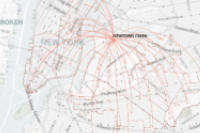

In [6]:
from IPython.display import display

items = gis.content.search('Pollution_WasterWater_t7_WFL1')
for item in items:
    display(item)

### Can add layer collections from the gallery to maps in the notebook
- Much more on this in the accessing_and_creating_content in 03_the_gis
- Must be a Feature Layer Collection, not a web map or map image to be added


In [7]:
map1.add_layer(item)

### Can filter to things only you've made or public content outside Pratt
More on this here: https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/

<Item title:"USA Food Expenditures at Home vs. Away from Home" type:Web Map owner:jimhe>
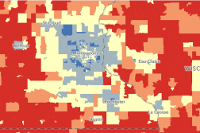

<Item title:"USA Food Expenditures at Home vs. Away from Home" type:Web Map owner:jimhe>


<Item title:"USA Census Populated Places" type:Feature Layer Collection owner:esri_dm>
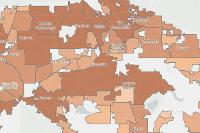

<Item title:"USA Census Populated Places" type:Feature Layer Collection owner:esri_dm>


<Item title:"2018-2023 USA Population Growth" type:Map Image Layer owner:esri>
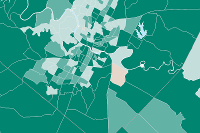

<Item title:"2018-2023 USA Population Growth" type:Map Image Layer owner:esri>


<Item title:"2018 USA Retail Goods Spending" type:Map Image Layer owner:esri>
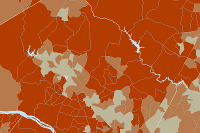

<Item title:"2018 USA Retail Goods Spending" type:Map Image Layer owner:esri>


<Item title:"2020 USA Property Crime" type:Map Image Layer owner:esri>
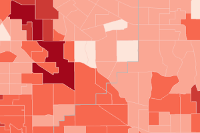

<Item title:"2020 USA Property Crime" type:Map Image Layer owner:esri>


<Item title:"USA Wildfire Activity (Mature Support)" type:Map Image Layer owner:esri>
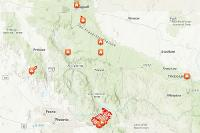

<Item title:"USA Wildfire Activity (Mature Support)" type:Map Image Layer owner:esri>


<Item title:"USA Population Density" type:Map Image Layer owner:AtlasPublisher>
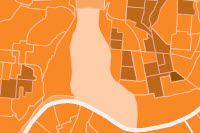

<Item title:"USA Population Density" type:Map Image Layer owner:AtlasPublisher>


<Item title:"USA State Plane Zones" type:Layer Package owner:esri_dm>
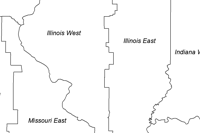

<Item title:"USA State Plane Zones" type:Layer Package owner:esri_dm>


<Item title:"USA Federal Lands (Mature Support)" type:Web Map owner:esri_landscape2>
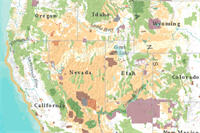

<Item title:"USA Federal Lands (Mature Support)" type:Web Map owner:esri_landscape2>


<Item title:"Highpoints USA TM" type:Web Map owner:tyson1>
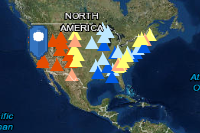

<Item title:"Highpoints USA TM" type:Web Map owner:tyson1>


In [8]:
#Looking for layers that are public outside of Pratt related to the US
search_result_USA= gis.content.search(query="title:USA*", outside_org=True)                  

from IPython.display import display
for item in search_result_USA:
    display(item)
    print(item)

In [9]:
#Add in NYC subways
map1.add_layer(search_result_USA[1])

#### Change the tab_mode to alter the display of the map in jupyter labs when you hit the  button. The options are:
- 'split-bottom': bottom half of screen
- 'split-top': top half of screen
- 'split-left': left half of screen
- 'split-right': right half of screen
- 'tab-before': full screen in a tab before current .ipynb
- 'tab-after': full screen in a tab after current .ipynb
- 'auto': auto

To get back to notebook just hit the 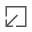  button

In [10]:
map1.tab_mode = "split-bottom"

### *When you add things to a map instance it changes all map instances, not just the most recently printed one*
ie. don't need to print map1 every time you add a layer - just print once at end of notebook 

**Don't need to re-execute the cell containing map1 each time you add a layer...it just automatically updates. Though when it lags reloading the cell can help**

In [11]:
map1

MapView(layout=Layout(height='400px', width='100%'), tab_mode='split-bottom')

### Say you want to open lots of different maps, one to the left, one to the right, and one above to compare, can use tab_mode and a loop to do this

In [13]:

# from arcgis.widgets import MapView

# tab_modes = ['split-top', 'split-left', 'split-right']
# i=0
# for webscene_id in ['31874da8a16d45bfbc1273422f772270',
#                     '91b46c2b162c48dba264b2190e1dbcff',
#                     '46c47340708f446ba7f112f139e8ae5e']:
#     webscene_item = gis.content.get(webscene_id)
#     map4 = MapView(gis=gis, item=webscene_item, mode="3D") 
#     map4.toggle_window_view(title=webscene_item.title, tab_mode=tab_modes[i])
#     i+=1

### Using spacially enabled dataframes (SEDF) to do pandas-esque analysis

This is **basically a geoapandas object** but doesn't require geoapndas to have the spatially aware geometries column: 
"When you inspect the type of the object, you get back a standard pandas DataFrame object. However, this object now has an additional SHAPE column that allows you to perform geometric operations. In other words, this DataFrame is now geo-aware."
(ie. **an SEDF is a pandas dataframe with a SHAPE column that is equivalent to the geometry column in a geopandas table**)

#### Turn query of feature collection on Online Portal into SEDF
Feature layers hosted on ArcGIS Online or ArcGIS Enterprise can be easily read into a Spatially Enabled DataFrame using the from_layer method. Once you read it into a SEDF object, you can create reports, manipulate the data, or convert it to a form that is comfortable and makes sense for its intended purpose.

Note: 
You *can also use sql queries* to return a subset of records by leveraging the ArcGIS API for Python's Feature Layer object itself.

`
known_item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
#Obtain the first feature layer from the item
fl = known_item.layers[0]
df = fl.query(where="AGE_45_54 < 1500").sdf
`

In [14]:
#Reading in the census populated areas feature collection that's public outside of Pratt and reading in the first feature layer as an SEDF
sdf = pd.DataFrame.spatial.from_layer(search_result_USA[1].layers[0])
sdf.head()

,CLASS,FID,HOUSEUNITS,NAME,ObjectID,PLACEFIPS,POP12_SQMI,POP2012,POP_CLASS,SHAPE,SQMI,ST,STFIPS
0,CDP,1,44,Oakville,500,53196,51.470588,70,1,"{""rings"": [[[-13626237.597601, 4642771.7675065...",1.36,CA,06
1,CDP,2,40,Olowalu,100,57650,27.986348,82,1,"{""rings"": [[[-17436759.3076978, 2371549.330447...",2.93,HI,15
2,CDP,3,18774,East Honolulu,0,06290,2122.752450,49821,6,"{""rings"": [[[-17556808.590812, 2426663.8150744...",23.47,HI,15
3,CDP,4,94,Rutherford,501,63400,96.428571,162,1,"{""rings"": [[[-13627870.0990921, 4645568.845926...",1.68,CA,06
4,CDP,5,287,Launiupoko,101,44075,114.150943,605,3,"{""rings"": [[[-17435592.355962, 2377230.8123182...",5.30,HI,15


### Doing the same but with a local shapefile (turning into SEDF)

In [3]:
print(os.getcwd())

C:\Users\scout\Documents\ArcGIS\Projects\SAVI_environmental_justice


In [31]:
# raw_data/proposed_FIRM_NYC_2015/s_fld_haz_ar.shp
path = r"C:\Users\scout\Dropbox\SAVI\NYC_environmental_justice\raw_data\effective_FIRM_NYC_2007\S_FLD_HAZ_AR.shp"
sdf_FIRM = pd.DataFrame.spatial.from_featureclass(path)
sdf_FIRM.head()


,FID,DFIRM_ID,VERSION_ID,FLD_AR_ID,STUDY_TYP,FLD_ZONE,ZONE_SUBTY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,AR_SUBTRV,BFE_REVERT,DEP_REVERT,DUAL_ZONE,SOURCE_CIT,SHAPE
0,0,360497,1.1.1.0,360497_67,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,,-9999.0,,,,-9999.0,-9999.0,,360497_FIS1,"{""rings"": [[[-73.93224617010458, 40.5800187804..."
1,1,360497,1.1.1.0,360497_68,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,F,-9999.0,,-9999.0,,-9999.0,,,,-9999.0,-9999.0,,360497_FIS1,"{""rings"": [[[-73.89504525953197, 40.5617983608..."
2,2,360497,1.1.1.0,360497_69,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,F,-9999.0,,-9999.0,,-9999.0,,,,-9999.0,-9999.0,,360497_FIS1,"{""rings"": [[[-74.1314031035929, 40.58496578209..."
3,3,360497,1.1.1.0,360497_70,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,,-9999.0,,,,-9999.0,-9999.0,,360497_FIS1,"{""rings"": [[[-73.8406949694475, 40.65603998477..."
4,4,360497,1.1.1.0,360497_71,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,,-9999.0,,,,-9999.0,-9999.0,,360497_FIS1,"{""rings"": [[[-73.8399369097603, 40.64953244097..."


In [32]:
path = r'C:\Users\scout\Dropbox\SAVI\NYC_environmental_justice\raw_data\proposed_FIRM_NYC_2015\s_fld_haz_ar.shp'
sdf_FIRM = pd.DataFrame.spatial.from_featureclass(path)
sdf_FIRM.head()

,FID,FLD_AR_ID,FLD_ZONE,FLOODWAY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,BFE_REVERT,DEP_REVERT,SOURCE_CIT,SHAPE
0,0,81,AE,,T,13.0,NAVD88,-9999.0,FEET,-9999.0,,,-9999.0,-9999.0,STUDY4,"{""rings"": [[[1032001.6909019053, 263867.838783..."
1,1,82,X,,F,-9999.0,,-9999.0,,-9999.0,,,-9999.0,-9999.0,STUDY4,"{""rings"": [[[1033748.9515149891, 263778.464290..."
2,2,83,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,,F,-9999.0,,-9999.0,,-9999.0,,,-9999.0,-9999.0,STUDY4,"{""rings"": [[[1033309.7010811567, 263544.180638..."
3,3,84,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,,F,-9999.0,,-9999.0,,-9999.0,,,-9999.0,-9999.0,STUDY4,"{""rings"": [[[1033414.1477226615, 262658.867776..."
4,4,85,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,,F,-9999.0,,-9999.0,,-9999.0,,,-9999.0,-9999.0,STUDY4,"{""rings"": [[[1034089.1152047515, 262466.033844..."


#### Do the same thing but with a local geodatabase (turning into SEDF)

In [6]:
print(fiona.listlayers('raw_data/MapPluto/MapPLUTO_20v6.gdb'))

sdf_mappluto = pd.DataFrame.spatial.from_featureclass("raw_data/MapPluto/MapPLUTO_20v6.gdb/MapPLUTO_20v6_clipped")
sdf_mappluto.head()

NameError: name 'fiona' is not defined

#### Can use an SEDF to easily export data to a file (feature layers/collections/shapefile/etc)
`sdf.spatial.to_featureclass(location=r"c:\output_examples\census.shp")
sdf.spatial.to_featureclass(location=r"c:\output_examples\census.gdb\cities");
lyr = sdf.spatial.to_featurelayer('census_cities', folder='census')
`

In [21]:
#This publishes it as a feature layer collection to my folder in the SAVI organization in ArcGIS online - can then look at it the online map viewer
lyr = sdf_FIRM.spatial.to_featurelayer('PFIRM')
lyr

<Item title:"PFIRM" type:Feature Layer Collection owner:Mhersher_prattSAVI>

### Plotting an SEDF on a map

In [33]:
high_risk = sdf_FIRM[sdf_FIRM['FLD_ZONE'].isin(["VE", 'AE', 'A'])]

In [20]:
#Each shape has a wkid
print(high_risk.iloc[2]['SHAPE'])

{'rings': [[[-74.15553578526936, 40.576113986489304], [-74.15569805768308, 40.5761570694923], [-74.15574717565926, 40.57617550837847], [-74.15577936349257, 40.57619646445613], [-74.15579646258328, 40.576215239928274], [-74.15580031826062, 40.5762397150973], [-74.15580132277978, 40.57626569900964], [-74.15580434157607, 40.576292521112634], [-74.15582227754777, 40.57632638401776], [-74.15585966085388, 40.5763563912455], [-74.15593677440012, 40.576396455452254], [-74.15603635145766, 40.576428810923744], [-74.15610927536, 40.57641171052336], [-74.1562658493865, 40.57631381115692], [-74.15633391047294, 40.57623200243302], [-74.15636425166736, 40.576194954403206], [-74.15644555747684, 40.57620367289633], [-74.15658955864257, 40.576203505258206], [-74.15669483539699, 40.57620685802107], [-74.156736408347, 40.57620216415302], [-74.15682324490558, 40.57621943088185], [-74.15688728267662, 40.576218257414894], [-74.15700529993, 40.57621909560561], [-74.15716472380495, 40.57623518886743], [-74.157

In [34]:
#Initiate map
map2 = GIS().map("New York City")
map2.basemap = "gray-vector"
map2.zoom = 11

In [ ]:
county_sdf.spatial.plot(map_widget=m9,
                        renderer_type='u', 
                       col='OBJECTID')

In [35]:
#Plot SEDF - need to specify renderer_type to get polygons ('u' will color based on the categorical string in col)
high_risk.spatial.plot(map_widget = map2, renderer_type='u', col='FLD_ZONE', line_width = .1)

C:\Users\scout\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


True

In [36]:
map2

MapView(layout=Layout(height='400px', width='100%'))

### Guide to adjusting the basemap, zoom level, etc
https://developers.arcgis.com/python/guide/using-the-map-widget/